In [ ]:
! pip install datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.5 MB/s eta 0:00:00


# Q1

Download the Yelp review dataset “Yelp/yelp_review_full”. Split each sample by calling the string method “.split()” and choose the correct statements about the dataset.

A. The dataset contains close to 99 million words

B. There are more than 300 samples that contain a single word

C. There are less than 300 samples that contain only a single word

D. “Cheesy-melty-roasted-cauliflower-with-fresh-bread-crumbs-on top.\\nTo-die-for.” is one of the single words in the dataset

E. The average length of a sample is 134.1

F. The distribution of the length of the samples is right skewed


In [ ]:

from datasets import load_dataset, load_from_disk

In [ ]:
ds = "Yelp/yelp_review_full"
yelp_ds = load_dataset(ds, split="all")

README.md:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/299M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
yelp_ds

Dataset({
    features: ['label', 'text'],
    num_rows: 700000
})

In [ ]:
def split(x):
    x["num_tokens"] =  len(x["text"].split())
    return x

In [ ]:
yelp_ds = yelp_ds.map(split)

Map:   0%|          | 0/700000 [00:00<?, ? examples/s]

In [ ]:
# total_tokens=0
# for x in yelp_ds:
#     total_tokens+=x["num_tokens"]

In [ ]:
# total tokens
total_tokens

93878307

In [ ]:
# # count single word
# count_sw = 0
# for x in yelp_ds:
#     if x["num_tokens"] == 1:
#         count_sw+=1


In [ ]:
count_sw

355

In [ ]:
# Average length
# total_tokens/len(yelp_ds)

134.11186714285714

In [ ]:
single_word=yelp_ds.filter(lambda x: "Cheesy-melty-roasted-cauliflower-with-fresh-bread-crumbs-on top.\\nTo-die-for." in x["text"])
single_word

Filter:   0%|          | 0/700000 [00:00<?, ? examples/s]

Dataset({
    features: ['label', 'text', 'num_tokens'],
    num_rows: 0
})

In [ ]:
# distribution count

d = {}

for x in yelp_ds:
    try:
        d[x["num_tokens"]] += 1
    except KeyError:
        d[x["num_tokens"]] = 1


<BarContainer object of 1006 artists>

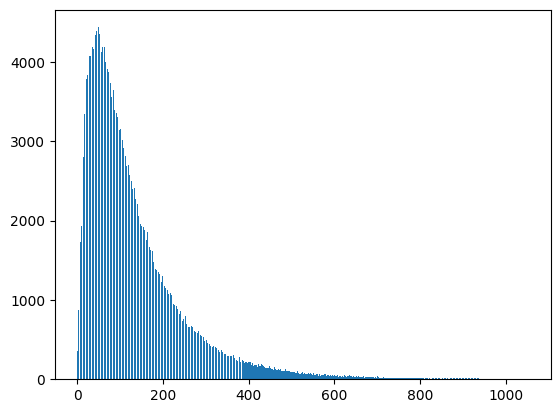

In [ ]:
import matplotlib.pyplot as plt
keys = list(d.keys())
values = list(d.values())

# Create a bar chart
plt.bar(keys, values)

# Q2

Load the “bert-base-uncased” pre-trained tokenizer and choose the correct statements about the tokenizer.

A. The tokenizer is used for the BERT model with the context length of 512

B. The tokenizer has 5 special tokens

C. Tokenizing a sample that contains more than 512 words would result in truncation of all tokens beyond the length 512

D. Tokenizer inserts all the special tokens when it processes a single sample as an input

E. Tokenizer inserts [CLS] and [SEP] special tokens when it processes a single sample as an input

F. Tokenizer inserts only [CLS]special token when it processes a single sample as an input



In [ ]:
from transformers import AutoTokenizer, BertTokenizerFast

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
bert_tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
# number of special tokens
special_tokens = bert_tokenizer.all_special_tokens
print(len(special_tokens))

5


In [ ]:
yelp_test = yelp_ds.filter(lambda x: len(x["text"].split(" ")) > 768)

Filter:   0%|          | 0/700000 [00:00<?, ? examples/s]

In [ ]:
yelp_test

Dataset({
    features: ['label', 'text', 'num_tokens'],
    num_rows: 2778
})

In [ ]:
encoded=bert_tokenizer.encode(yelp_test[2]["text"])

Token indices sequence length is longer than the specified maximum sequence length for this model (1050 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
print(bert_tokenizer.convert_ids_to_tokens(encoded))

['[CLS]', 'upon', 'receipt', 'of', 'the', 'much', '-', 'coveted', 'big', 'burr', '##ito', 'birthday', 'vo', '##ucher', ',', 'i', 'had', 'to', 'make', 'the', 'tough', 'decision', 'about', 'which', 'of', 'their', 'restaurants', 'to', 'visit', '.', 'i', 'was', 'torn', 'between', 'cas', '##bah', 'and', 'eleven', ',', 'but', 'upon', 'peru', '##sing', 'the', 'menu', '##s', ',', 'reading', 'reviews', ',', 'and', 'giving', 'the', 'matter', 'much', 'thought', ',', 'i', 'settled', 'on', 'cas', '##bah', '.', 'i', 'knew', 'i', "'", 'd', 'made', 'a', 'good', 'decision', 'when', 'i', 'invited', 'some', 'friends', 'to', 'join', 'me', ',', 'and', 'they', 'said', 'that', ',', 'based', 'on', 'their', 'past', 'experience', ',', 'i', "'", 'd', 'made', 'an', 'excellent', 'choice', '!', '\\', 'n', '\\', 'no', '##ur', 'meal', 'started', 'off', 'with', 'a', 'few', 'slices', 'of', 'bread', ',', 'which', 'came', 'with', 'butter', 'and', 'a', 'greek', 'yo', '##gur', '##t', 'spread', '.', 'the', 'butter', 'was', 

In [ ]:
# bert_tokenizer.convert_tokens_to_ids(bert_tokenizer.tokenize(yelp_test[2]["text"]), add_)

# Q3

Use “BertConfig” and “BertForMaskedLM” to construct the default (original) BERT model. Choose the correct statements

A. The model has 12 Bert layers

B. The model has 6 Bert layers

C. The model uses absolute position embeddings

D. The word embedding (token embedding) layer has about 23 million learnable parameters

E. The total number of parameters in the model is close to 110 million

In [ ]:
from transformers import BertConfig, BertForMaskedLM

In [ ]:
configurations = BertConfig()
print(configurations)

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [ ]:
# word embedding layer dimension
configurations.hidden_size*configurations.vocab_size

23440896

In [ ]:
model = BertForMaskedLM(configurations)

In [ ]:
# number of parameters
total_params = 0
for params in model.parameters():
    total_params+=params.numel()
print(total_params)

109514298


# Q4

 Double the context length from 512 to 1024 (you can change it in the configuration). Count the number of parameters and enter the change in the number of parameters (in millions) compared to the default configuration.


In [ ]:
configurations.max_position_embeddings = 1024

In [ ]:
model2 = BertForMaskedLM(configurations)
model2

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(1024, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementw

In [ ]:
# number of parameters
total_params = 0
for params in model2.parameters():
    total_params+=params.numel()
print(total_params)

109907514


In [ ]:
# change in the parameters

109907514 - 109514298

393216

# Q5

Pack (chunk) the samples such that the length of all the samples in the dataset is 512 (for efficient training). Define a mapping function that implements the following procedure
 1. Take a batch of 1000 samples

 2. Tokenize it to get input IDs and attention mask

 3. Concatenate all the input IDs

 4. Chunk the concatenated IDs into a size of 512

 5. Drop the last chunk if its length is less than 512

 6. Pack all the chunks

 7. Iterate over all the batches in the dataset
Store the resulting dataset in the variable “ds_chunked”. Enter the total number of samples in the new dataset.
Note: the batch size should be kept at 1000 while calling "ds.map()" for theanswer to match.


In [ ]:
from transformers import BertConfig, BertForMaskedLM
from transformers import AutoTokenizer, BertTokenizerFast

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
tokenizer=BertTokenizerFast.from_pretrained("bert-base-uncased")
model = BertForMaskedLM(BertConfig())
# model

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
def process_batch(data):
    tokens=[]
    masks=[]
    types=[]

    token_ids=[]
    mask=[]
    type_ids=[]
    for text in data["text"]:
        t=tokenizer(text)
        # accumulate till 512+
        tokens.extend(t["input_ids"])
        masks.extend(t["attention_mask"])
        types.extend(t["token_type_ids"])
        # add if tokens accumulated >= 512
        if len(tokens) >= 512:
            while len(tokens) >= 512:
                token_ids.append(tokens[0:512])
                mask.append(masks[0:512])
                type_ids.append(types[0:512])

                try:
                    tokens=tokens[512:]
                    masks=masks[512:]
                    types=types[512:]
                except IndexError:
                    # list had exactly 512 elements!
                    tokens=[]
                    masks=[]
                    types=[]

    assert len(tokens) < 512, "Something went wrong!"
    print("tokens left:", len(tokens))
    return {"input_ids": token_ids, "attention_mask":mask, "token_type_ids":type_ids}

In [ ]:
def create_chunk_ds(examples):
    block_size=512
    examples=tokenizer(examples["text"])
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}

    total_length = len(concatenated_examples[list(examples.keys())[0]])
    result = {
        k: [
            t[i : i + block_size]
            for i in range(0, total_length, block_size)
            if(i+block_size<total_length)
           ]
        for k, t in concatenated_examples.items()
    }
    return result

In [ ]:
chunked_ds = yelp_ds.map(create_chunk_ds, batched=True, batch_size=1000, remove_columns=["text", "label"], num_proc=4)

Map (num_proc=4):   0%|          | 0/700000 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (567 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1019 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (539 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (942 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
chunked_ds

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 246694
})

In [ ]:
import datasets
datasets.__version__

'3.0.1'

In [ ]:
! python --version

Python 3.10.12


In [ ]:
# chunked_ds.save_to_disk("/content/drive/MyDrive/@Degree/Sep-2024/DLP/chunked_data")

Saving the dataset (0/2 shards):   0%|          | 0/246695 [00:00<?, ? examples/s]

In [ ]:
chunked_ds = load_from_disk("/content/drive/MyDrive/@Degree/Sep-2024/DLP/chunked_data")

# Q6


 Split the new dataset into training and test sets with the test_size=0.05 and seed=42. Use the appropriate data collator function for the MLM objective and set the masking probability to 0.2. Use the data loader from PyTorch to load a batch of samples, and enter the token ID corresponding to the unmasked token


In [1]:
! pip install datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset, load_from_disk

In [3]:
chunked_ds = load_from_disk("/content/drive/MyDrive/@Degree/Sep-2024/DLP/chunked_data")

In [4]:
split_ds = chunked_ds.train_test_split(test_size=0.05,seed=42)
split_ds

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'token_type_ids'],
        num_rows: 234360
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'token_type_ids'],
        num_rows: 12335
    })
})

# Q7

Create a small BERT model by changing the following hyper-parameters and keeping the other hyper-parameters as is

 * num_hidden_layers = 6

 * hidden size: 384

 * intermediate_size: 1536

 and start training the model with a batch of size 8 for an epoch. What is the loss value at the end of the training?
Note: You may optionally save the checkpoints for every N-th step.

In [5]:
from transformers import BertTokenizerFast
from transformers import TrainingArguments, Trainer
from transformers import DataCollatorForLanguageModeling
from transformers import BertConfig, BertForMaskedLM
from torch.utils.data import DataLoader
from pprint import pprint

In [6]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=True, mlm_probability=0.2)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [7]:
configurations = BertConfig()
configurations.num_hidden_layers=6
configurations.hidden_size=384
configurations.intermediate_size=1536
configurations

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [8]:
model = BertForMaskedLM(configurations)

# Q6

In [9]:
dataloader = DataLoader(dataset=split_ds['train'],
                        collate_fn=data_collator,
                        batch_size=1000,
                        )

In [10]:
# for batch in dataloader:
#     pprint(batch)
#     break

# Q7

## Training

In [11]:
training_args=TrainingArguments(
    output_dir="bert-1e",
    evaluation_strategy="steps",
    save_strategy="steps",
    save_steps=5000,
    eval_steps=5000,
    num_train_epochs=1,
    per_device_train_batch_size=8
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [12]:
trainer = Trainer(model=model,
                 args = training_args,
                 train_dataset=split_ds["train"],
                 eval_dataset= split_ds["test"],
                 data_collator = data_collator)

In [ ]:
results = trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss,Validation Loss


NameError: name 'split_ds' is not defined